In [ ]:
#import zipfile module
from zipfile import ZipFile

with ZipFile('archive.zip', 'r') as f:

#extract in current directory
    f.extractall()

In [1]:
import os
# import cv2
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [4]:
d ={}
train_path = "./train"
for folder in sorted(os.listdir(train_path)): 
    folder_path = os.path.join(train_path,folder)
    d[folder] = []
    for image in os.listdir(folder_path)[:5]:
        image_path = os.path.join(folder_path,image)
        image = np.array(Image.open(image_path))
        d[folder].append(image)

FileNotFoundError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
def plot_images(d,label): 
    fig, ax = plt.subplots(1,5, figsize = (10,2))
    fig.suptitle('Images labelled : {}' .format(label), fontsize=11)
    for col in range(5): 
        ax[col].imshow(d[label][col])
        ax[col].tick_params(
        axis = 'both',
        which='both',      
        bottom=False,
        left = False, 
        top=False,         
        labelbottom=False,
        labelleft=False)


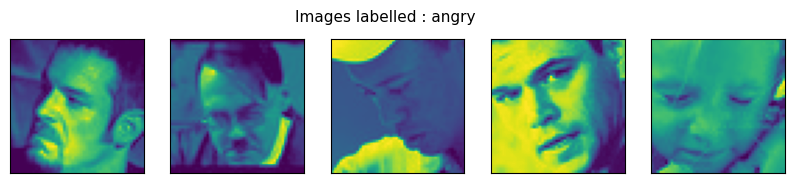

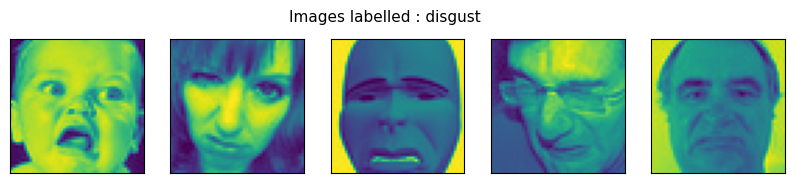

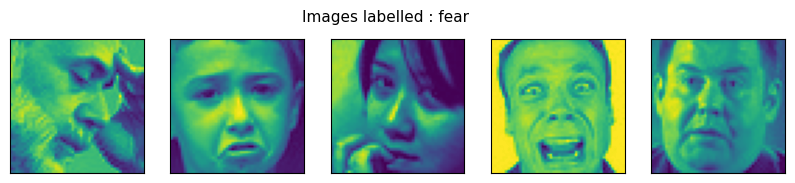

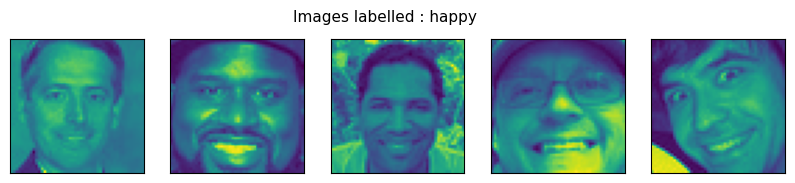

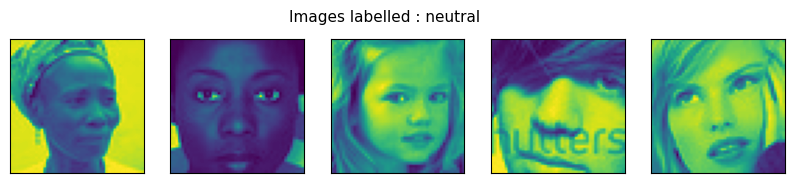

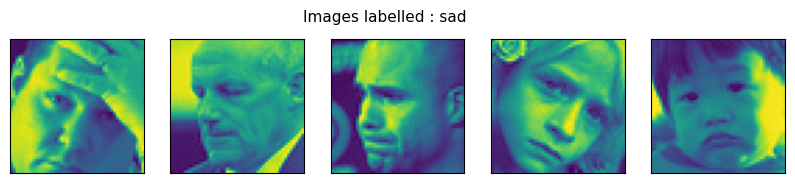

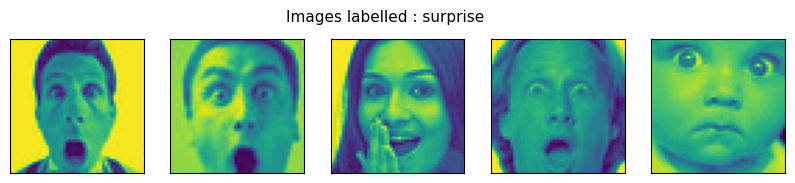

In [ ]:
for key in d.keys():
    plot_images(d,key)

In [ ]:
train_aug = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=25, width_shift_range=0.1,
        height_shift_range=0.1, shear_range=0.2, 
        zoom_range=0.2,horizontal_flip=True, 
        fill_mode="nearest")
val_aug = ImageDataGenerator(
        preprocessing_function=preprocess_input
)

In [ ]:
train_data = train_aug.flow_from_directory(
            train_path,
            target_size = (48,48),
            shuffle = True)

Found 28709 images belonging to 7 classes.


In [ ]:
val_data = val_aug.flow_from_directory(
        "./test",
        target_size = (48,48),
        shuffle = False
            )

Found 7178 images belonging to 7 classes.


In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64,(3,3),padding = "same", activation = "relu", input_shape = (48,48,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation = "relu",padding = "same"))
    
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
    model.add(MaxPool2D(2,2))
  
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [ ]:
model = create_model()

2023-05-10 08:21:04.829440: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 08:21:05.267827: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1621] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38318 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2023-05-10 08:21:05.269599: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1621] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38318 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2023-05-10 08:21:05.270445: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1621] Created device /job:localhost/replica

In [ ]:
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)      

In [1]:
model.fit(train_data,epochs = 50,validation_data = val_data)

NameError: ignored

In [ ]:
import keras
from keras.models import load_model

# Load the model
model = load_model('model.h5')

# Use the model to make predictions
# result = model.predict(x)

2023-05-11 09:46:57.691335: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 09:46:59.307416: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 09:46:59.729013: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1621] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1157 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2023-05-11 09:46:59.729982: 

/tmp/ipykernel_773/3792620866.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(val_data)


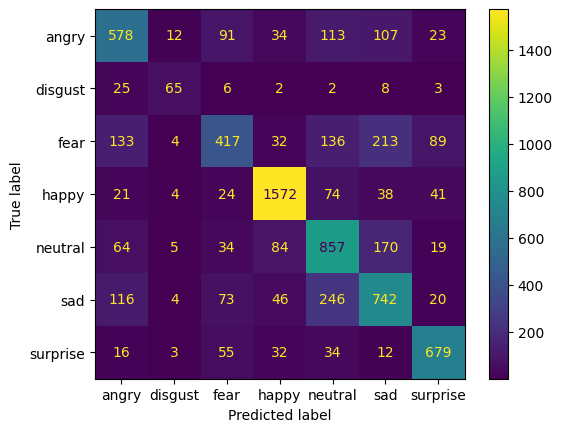

In [ ]:
y_pred = model.predict_generator(val_data)
y_pred_classes = np.argmax(y_pred, axis = 1)

ConfusionMatrixDisplay(confusion_matrix(val_data.classes,y_pred_classes),
                       display_labels=list(train_data.class_indices.keys())).plot()

In [ ]:
def get_label(i):
    return list(train_data.class_indices.keys())[i]

In [ ]:
X_test = []

test_path = "./test"

for folder in sorted(os.listdir(test_path)):
    image_folder =  test_path +"/"+ folder
    images = sorted(os.listdir(image_folder))
    print ('Loaded the images of -'+'{} having {} images. \n'.format(folder, len(images)))
    for image in images:
        image_path = image_folder +"/"+ image
        x = Image.open(image_path)
        x = x.convert("RGB")
        x = np.array(x)
        img_resize = cv2.resize(x, (224,224))
        X_test.append(img_resize)

In [ ]:
def plot_errors(true_label,predicted_label):
    rows,cols = 1,5
    fig, ax = plt.subplots(rows,cols,figsize=(10, 3))
    x = ((y_pred_classes == predicted_label) & (val_data.classes == true_label))
    y = np.where(x == True)[0]
    z = np.random.randint(0,len(y),5)
    fig.suptitle('Predicted : {}, Real : {}' .format(get_label(predicted_label), get_label(true_label)), fontsize=11)
    for col in range(cols):
        ax[col].imshow(X_test[y[z[col]]])
        ax[col].tick_params(
        axis = 'both',
        which='both',      
        bottom=False,
        left = False, 
        top=False,         
        labelbottom=False,
        labelleft=False)

In [ ]:
current_dir=os.getcwd()
model.save(os.path.join(current_dir,'model.h5'))

In [ ]:
model_save_name = 'demo_1'
path=F"\content/gdrive/My Drive/{model_save_name}"
torch.save(model.state_dict(),path)

In [ ]:
# Load the test dataset
x_test = ...  # Test dataset features
y_test = ...  # Test dataset labels

# Load the trained model
model = ...  # Load or define your trained model here

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)
